# Bank Marketing Champaign

## Bussiness Understanding


### Context 
Bank bukanlah satu-satunya bisnis yang menggunakan kampanye pemasaran. Kampanye pemasaran adalah proses di mana sebuah bisnis atau organisasi mengiklankan produknya kepada klien saat ini dan di masa depan. Dalam dataset ini, sebuah bank mempromosikan agar kliennya menyetor dana ke dalam akun mereka, baik mereka merupakan pelanggan saat ini atau calon pelanggan yang telah memiliki akun dengan bank tersebut.

Pendapatan yang dihasilkan selama kampanye, baik jangka pendek maupun jangka panjang, serta seberapa banyak biaya akuisisi klien yang berhasil dikurangi oleh kampanye itu sendiri digunakan untuk menentukan seberapa efektif kampanye pemasaran tersebut.

Untuk melakukan upaya pemasaran ini, bank akan menelepon pelanggannya melalui telepon rumah dan telepon seluler mereka.

Berikut adalah data dari hasil kampanye pemasaran bank yang dilakukan melalui panggilan telepon langsung untuk menaruh deposit berjangka. Untuk klien yang setuju untuk menaruh deposit, variabel target akan diisi dengan 'yes', jika tidak 'no'

Target: 
* 0 : Tidak menaruh deposit 
* 1 : Menaruh deposit

### Problem Statement 
Isu utama dari dataset ini adalah menentukan bagaimana meningkatkan efektivitas kampanye pemasaran, target market, dan dengan demikian, meningkatkan pendapatan yang dihasilkan dari produk, dalam contoh ini, setoran.

Karena kesuksesan kampanye pemasaran ini tergantung pada keputusan klien untuk melakukan setoran di bank, sangat penting untuk terlebih dahulu memahami faktor-faktor kunci yang mempengaruhi keputusan ini, serta memprediksi konsumen mana yang akan melakukan setoran sehingga kita dapat fokus pada kampanye pemasaran untuk pelanggan tersebut.

### Goals 
Oleh karena itu, untuk menentukan apakah seorang calon pelanggan akan melakukan setoran selama kampanye pemasaran atau tidak, bank memerlukan sebuah alat. Sifat dataset, seperti informasi pelanggan dan dampak kampanye pemasaran pada setoran klien, sangat penting dalam hal ini.

Sebagai hasilnya, dengan menggunakan model machine learning, kita dapat memprediksi kecenderungan seorang calon pelanggan untuk melakukan setoran berdasarkan kampanye pemasaran dan juga mengevaluasi efek fitur pada keputusan konsumen. Setiap faktor ini berpotensi untuk meningkatkan pendapatan bank melalui peningkatan setoran, dan prediksi setoran pelanggan dapat membantu bank menentukan pelanggan mana yang harus diprioritaskan.

### Analytic Approach

Tugas yang akan dilakukan adalah melakukan analisis data untuk mengidentifikasi pola yang membedakan kandidat nasabah yang akan menempatkan deposit dan yang tidak. Selanjutnya, langkah berikutnya adalah membangun sebuah model klasifikasi untuk membantu bank dalam memprediksi probabilitas bahwa seorang calon nasabah akan atau tidak akan menempatkan deposit.

## Metric Evaluation 
Type 1 error : False Positive  
Konsekuensi: membuang waktu dan biaya kampanye untuk nasabah yang tidak berpotensial menaruh deposit

Type 2 error : False Negative  
Konsekuensi: kehilangan kandidat nasabah potensial

Dalam rangka untuk mengurangi biaya kampanye bank tanpa mengurangi jumlah nasabah potensial yang diinginkan oleh bank, model akan dibuat seoptimal mungkin. Tujuannya adalah untuk memprediksi kelas positif sebanyak mungkin dengan meminimalkan jumlah prediksi false positive. Oleh karena itu, Precission Score akan digunakan sebagai metrik utama.

## Data Understanding 
* Terdapat ketidakseimbangan pada dataset.
* Sebagian besar fitur pada dataset bersifat kategorikal, baik nominal maupun ordinal, dengan beberapa fitur memiliki kardinalitas yang tinggi.
* Setiap baris pada dataset merepresentasikan informasi kandidat nasabah yang pernah melakukan deposit di masa lalu.

|Feature|Data Type|Description|
| --- | --- | --- |
| Age | int64 | The age of the Customer |
| Job| Object | The type of job of the customer |
| Balance | int64 | The current balance of the customer's bank account |
| Housing | Object | Whether the customer currently have a housing or not |
| Loan | Object | Whether the customer currently loaning or not |
| Contact | Integer | How the customer is contacted by the bank |
| Month | Object | The month of the last contact with the customer |
| Campaign | int64 | Number of times the customer is contacted during the campaign |
| pdays | int64 | The number of days since the customer was last contacted |
| poutcome | Integer | The outcome of the previous marketing campaign |
| Deposit | Object | Whether the customer deposit or not |

# Importing Libraries & Analyzing Dataframe

In [215]:
# Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [228]:
# Reading Dataset
df = pd.read_csv('bank_marketing.csv')
df.head()

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no


In [285]:
# Info Jumlah dan tipe data pada setiap kolom 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813 entries, 0 to 7812
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       7813 non-null   int64 
 1   job       7813 non-null   object
 2   balance   7813 non-null   int64 
 3   housing   7813 non-null   object
 4   loan      7813 non-null   object
 5   contact   7813 non-null   object
 6   month     7813 non-null   object
 7   campaign  7813 non-null   int64 
 8   pdays     7813 non-null   int64 
 9   poutcome  7813 non-null   object
 10  deposit   7813 non-null   object
dtypes: int64(4), object(7)
memory usage: 671.6+ KB


# Exploratory Data Analysis (EDA)

In [289]:
df.describe(include='all')

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
count,7813.000000,7813,7813.000000,7813,7813,7813,7813,7813.000000,7813.000000,7813,7813
unique,NaN,12,NaN,2,2,3,12,NaN,NaN,4,2
top,NaN,management,NaN,no,no,cellular,may,NaN,NaN,unknown,no
freq,NaN,1792,NaN,4140,6789,5628,1976,NaN,NaN,5819,4081
mean,41.257264,NaN,1512.448611,NaN,NaN,NaN,NaN,2.519775,51.408550,NaN,NaN
std,11.919710,NaN,3089.291831,NaN,NaN,NaN,NaN,2.727001,108.072739,NaN,NaN
min,18.000000,NaN,-6847.000000,NaN,NaN,NaN,NaN,1.000000,-1.000000,NaN,NaN
25%,32.000000,NaN,127.000000,NaN,NaN,NaN,NaN,1.000000,-1.000000,NaN,NaN
50%,39.000000,NaN,549.000000,NaN,NaN,NaN,NaN,2.000000,-1.000000,NaN,NaN
75%,49.000000,NaN,1684.000000,NaN,NaN,NaN,NaN,3.000000,40.000000,NaN,NaN


In [291]:
# Unicode feature deposit
df['deposit'].value_counts()

no     4081
yes    3732
Name: deposit, dtype: int64

In [292]:
# Unicode feature job 
df['job'].value_counts()

management       1792
blue-collar      1346
technician       1291
admin.            936
services          658
retired           540
self-employed     280
unemployed        249
student           247
entrepreneur      236
housemaid         184
unknown            54
Name: job, dtype: int64

Berdasarkan unique value, terdapat 4081 orang yang tidak melakukan deposit dan 3732 orang yang melakukan deposit.

Sementara itu, pekerjaan yang paling banyak dipegang adalah di bidang manajemen dengan jumlah 1792 orang, diikuti oleh pekerjaan blue-collar sebanyak 1346 orang, dan technician sebanyak 1291 orang. Pekerjaan yang paling sedikit dipegang adalah unknown dengan hanya 54 orang.

In [519]:
# Uniqode feature age
df['age'].value_counts()

31    351
32    344
30    329
35    324
33    317
     ... 
93      2
86      2
90      2
92      1
95      1
Name: age, Length: 75, dtype: int64

In [295]:
# Unicode Feature balance
df['balance'].value_counts()

0       546
1        28
3        21
2        20
5        17
       ... 
1920      1
4101      1
824       1
4654      1
5473      1
Name: balance, Length: 3153, dtype: int64

terdapat 75 nilai umur yang berbeda-beda, dengan rentang usia tertinggi di angka 31 serta paling sedikit di usia 92 & 95 tahun.
ementara itu, nilai saldo bank yang dimiliki oleh responden sangat bervariasi, dengan rentang antara 0 hingga 5473. Jumlah orang dengan saldo bank nol adalah yang paling banyak, yakni sebanyak 546 orang

# Data Distribution 

<Figure size 800x600 with 0 Axes>

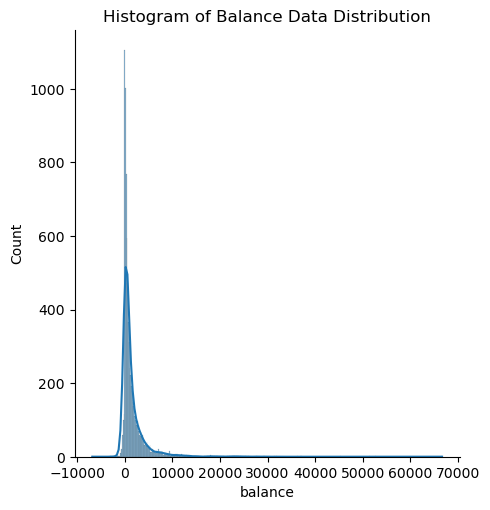

<Figure size 800x600 with 0 Axes>

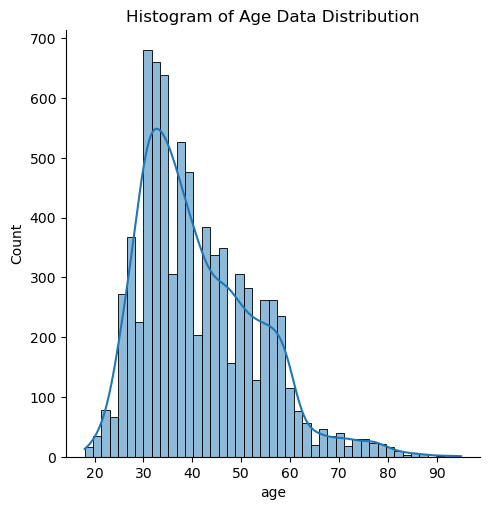

<Figure size 800x600 with 0 Axes>

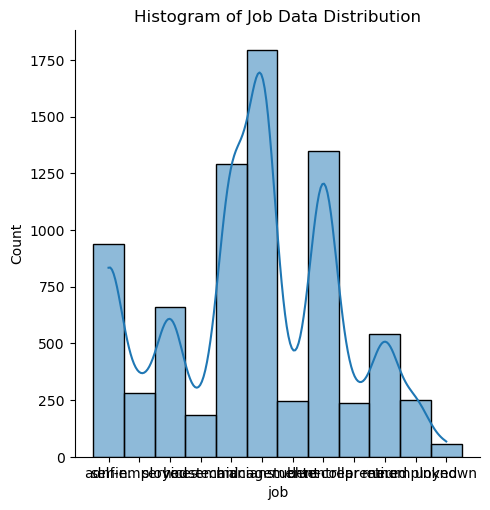

<Figure size 800x600 with 0 Axes>

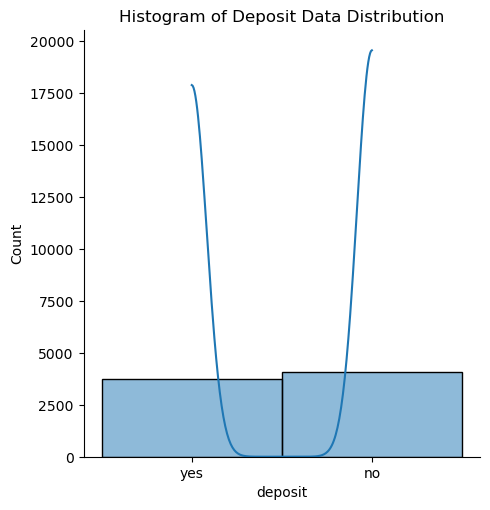

In [521]:
plt.figure(figsize = (8, 6))
sns.displot(df['balance'], kde = True)
plt.title('Histogram of Balance Data Distribution')
plt.show()

plt.figure(figsize = (8, 6))
sns.displot(df['age'], kde = True)
plt.title('Histogram of Age Data Distribution')
plt.show()

plt.figure(figsize = (8, 6))
sns.displot(df['job'], kde = True)
plt.title('Histogram of Job Data Distribution')
plt.show()

plt.figure(figsize = (8, 6))
sns.displot(df['deposit'], kde = True)
plt.title('Histogram of Deposit Data Distribution')
plt.show()

In [310]:
# Normality test feature menggunakan chisquare 
from scipy.stats import chisquare

column = ['deposit', 'job', 'age', 'balance']
hasil = []

for i in column:
    observed_freq = df[i].value_counts()
    expected_freq = [len(df[i]) / len(observed_freq)] * len(observed_freq)
    # hitung nilai chi-square dan p-value
    chi2, pval = chisquare(observed_freq, expected_freq)
    if pval > 0.05:
        hasil.append('Distribusi merata')
    else:
        hasil.append('Tidak berdistribusi merata')

pd.DataFrame({'Kolom':column, 'Distribusi':hasil})

,Kolom,Distribusi
0,deposit,Tidak berdistribusi merata
1,job,Tidak berdistribusi merata
2,age,Tidak berdistribusi merata
3,balance,Tidak berdistribusi merata


Berdasarkan keterangan yang diberikan, terdapat empat variabel yang dinyatakan tidak berdistribusi merata, yaitu variabel deposit, job, age, dan balance.

Variabel deposit menunjukkan bahwa distribusi antara jumlah orang yang melakukan deposit dan tidak melakukan deposit tidak merata, dengan jumlah orang yang tidak melakukan deposit lebih banyak daripada yang melakukan deposit.

Variabel job menunjukkan bahwa distribusi antara jenis pekerjaan tidak merata, dengan sebagian besar responden memiliki pekerjaan di bidang manajemen, blue-collar, dan teknisi.

Variabel age menunjukkan bahwa distribusi usia responden tidak merata, dengan sebagian besar responden berada pada rentang usia yang lebih muda, dan hanya sedikit yang berada pada rentang usia yang lebih tua.

Variabel balance menunjukkan bahwa distribusi saldo bank responden tidak merata, dengan sebagian besar responden memiliki saldo bank nol, dan hanya sedikit yang memiliki saldo bank yang lebih besar.

## Balance of Dataset

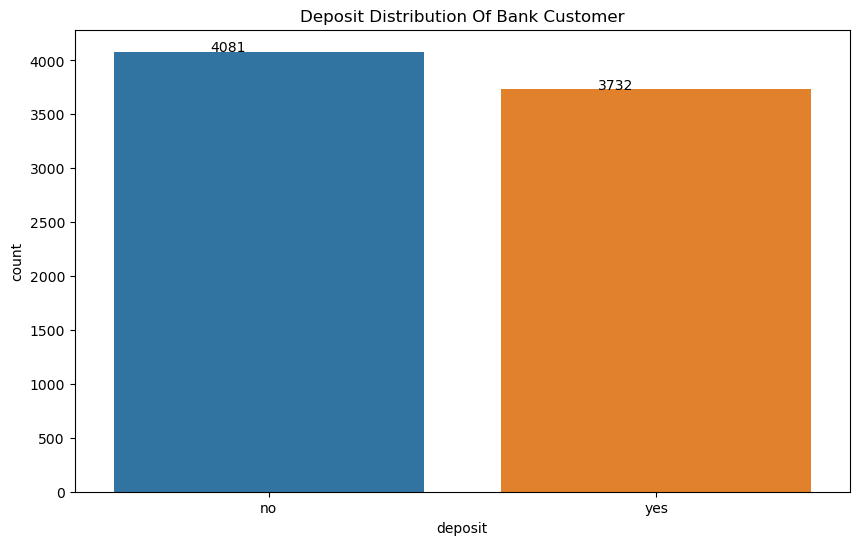

In [315]:
# Deposit Distribution Of Bank Customer
plt.figure(figsize = (10,6))
fig = sns.countplot(data = df,x='deposit',order = df['deposit'].value_counts().index)

for p in fig.patches:
   fig.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.title('Deposit Distribution Of Bank Customer')
plt.show()

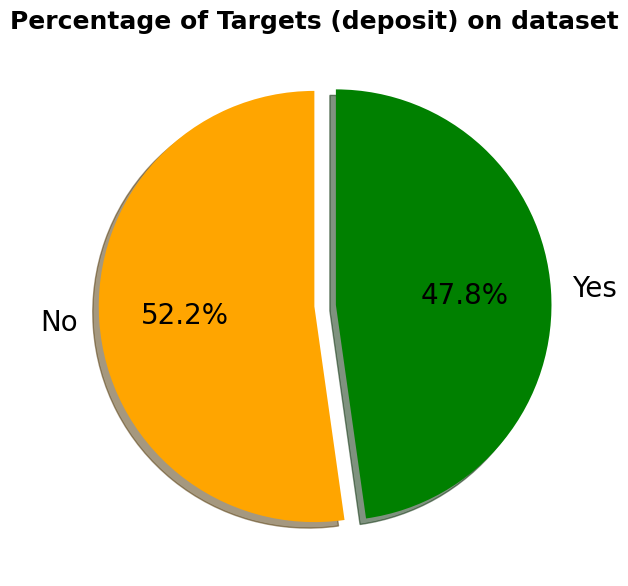

In [220]:
plt.figure(figsize=(7,7))
plt.title("Percentage of Targets (deposit) on dataset", size=18, weight='bold')
plt.pie(df['deposit'].value_counts(), explode=(0,0.1), labels=['No', 'Yes'], colors=["orange","green"], autopct='%1.1f%%', shadow=True, 
        startangle=90, textprops={"fontsize":20})

plt.show()

Dalam dataset ini, 52,2% dari pelanggan tidak melakukan deposit, sedangkan 47,8% dari pelanggan melakukannya. Hal ini ditunjukkan dalam diagram lingkaran di atas. Karena kelas target dalam dataset ini seimbang, tidak diperlukan fungsi yang tidak seimbang untuk digunakan selama proses pemodelan, seperti yang dapat disimpulkan dari hal ini.

## Balance vs Deposits of Customers

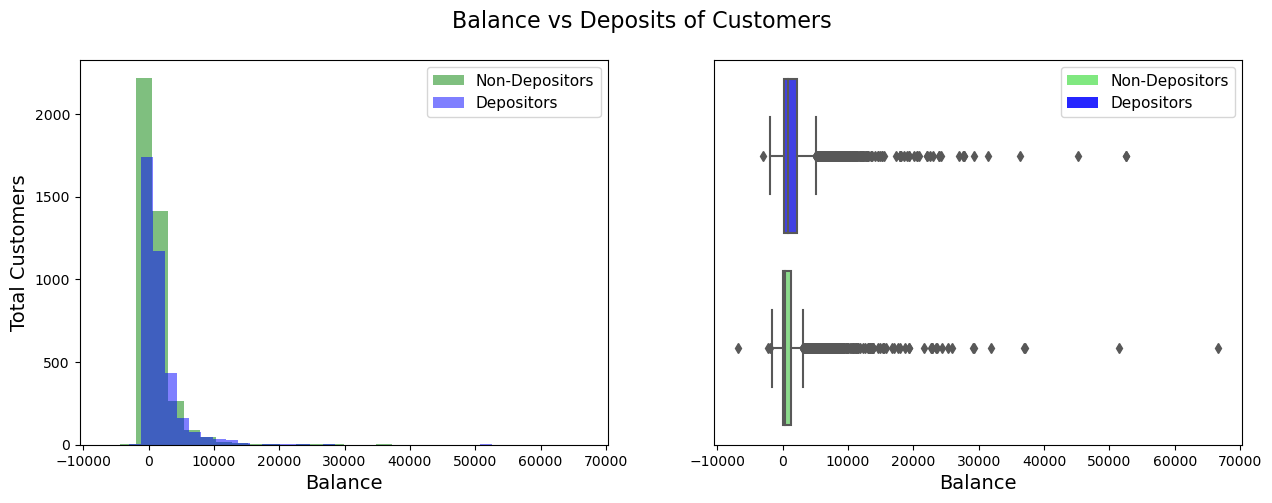

In [221]:
from matplotlib.patches import Patch
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle("Balance vs Deposits of Customers", size = 16)

# Subplot 1
ax[0].hist(df[df["deposit"]=='no']["balance"], bins=30, alpha=0.5, color="green", label="Non-Depositors")
ax[0].hist(df[df["deposit"]=='yes']["balance"], bins=30, alpha=0.5, color="blue", label="Depositors")

ax[0].set_xlabel("Balance", fontsize=14)
ax[0].set_ylabel("Total Customers", fontsize=14)
ax[0].legend(fontsize = 11);

# Subplot 2
sns.boxplot(x="balance", y="deposit", data=df, orient="h", palette={ 'no':"#80e880", 'yes':"#2626ff"}, ax = ax[1])
ax[1].get_yaxis().set_visible(False)
ax[1].set_xlabel('Balance', fontsize=14)

color_patches = [
    Patch(facecolor="#80e880", label="Non-Depositors"),
    Patch(facecolor="#2626ff", label="Depositors")
]
ax[1].legend(handles=color_patches, fontsize=11);

* Kebanyakan nasabah bank memiliki <b>saldo yang lebih kecil</b>.
* Nasabah dengan saldo dalam <b>semua rentang</b> melakukan setoran.
* Namun, sebagian besar <b>setoran</b> diterima dari nasabah dengan saldo dalam rentang <b>(0 - 1250)</b>.
* Terdapat outlier untuk nasabah yang memiliki saldo lebih dari 40.000

## Age vs Deposits of Customers

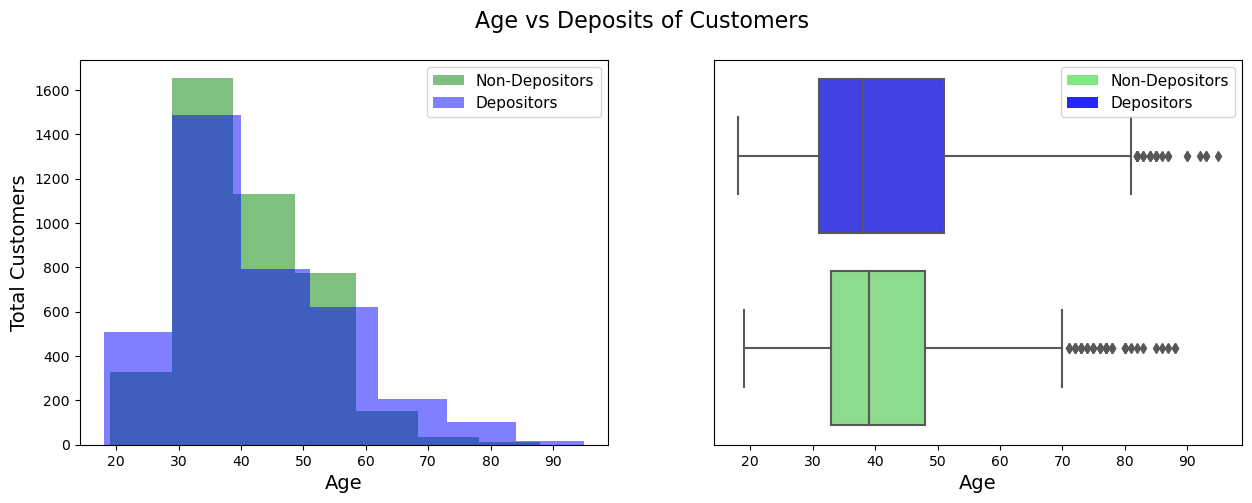

In [222]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle("Age vs Deposits of Customers", size = 16)

# Subplot 1
ax[0].hist(df[df["deposit"]=='no']["age"], bins=7, alpha=0.5, color="green", label="Non-Depositors")
ax[0].hist(df[df["deposit"]=='yes']["age"], bins=7, alpha=0.5, color="blue", label="Depositors")

ax[0].set_xlabel("Age", fontsize=14)
ax[0].set_ylabel("Total Customers", fontsize=14)
ax[0].legend(fontsize = 11);

# Subplot 2
sns.boxplot(x="age", y="deposit", data=df, orient="h", palette={ 'no':"#80e880", 'yes':"#2626ff"}, ax = ax[1])
ax[1].get_yaxis().set_visible(False)
ax[1].set_xlabel('Age', fontsize=14)

color_patches = [
    Patch(facecolor="#80e880", label="Non-Depositors"),
    Patch(facecolor="#2626ff", label="Depositors")
]
ax[1].legend(handles=color_patches, fontsize=11);

In [529]:
# Meean antara customer yang melakukan deposit dan tidak berdasarkan usia
df.groupby('deposit').mean()['age'].sort_values(ascending=False)

deposit
yes    41.837889
no     40.726293
Name: age, dtype: float64

* Nasabah dari <b>semua kelompok usia</b> melakukan <b>setoran</b>.
* Kebanyakan nasabah berada dalam kelompok usia <b>(25-55)tahun</b>. Sebagian besar dari mereka tidak melakukan deposit
* Range nasabah yang melakukan deposit ada di usia 18-95 tahun.
* Rata-Rata usia yang melakukan deposit ada di angka 42 tahun sedangkan rata-rata yang tidak melakukan deposit ada di angka 41 tahun.

## Job vs Deposit of Customers

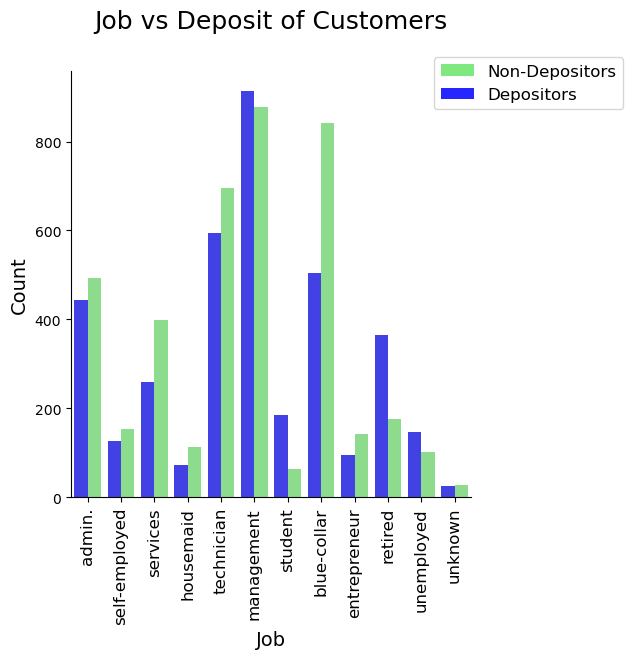

In [283]:
fig, ax = plt.subplots()

sns.catplot("job", hue = 'deposit', data=df, kind="count", palette={'no':"#80e880", 'yes':"#2626ff"}, legend = False)

color_patches = [
    Patch(facecolor="#80e880", label="Non-Depositors"),
    Patch(facecolor="#2626ff", label="Depositors")
]

plt.title("Job vs Deposit of Customers", size = 18, y=1.08) 
plt.xlabel("Job", size = 14)
plt.ylabel("Count", size = 14)
plt.xticks(size = 12, rotation = 'vertical')
plt.legend(handles = color_patches, fontsize = 12,  bbox_to_anchor=(1.4,1.05))

plt.close(1) 

* Nasabah dari jenis pekerjaan <b>manajemen, pensiunan, pengangguran, dan mahasiswa</b> cenderung melakukan <b>setoran</b>.
* Nasabah yang bekerja di bidang management dan blue collar cenderung banyak yang melakukan deposit namun tidak sedikit juga yang tidak melakukan deposit

# Data Preprocessing
Proses preprocessing adalah tahap penting dalam analisis data yang mencakup serangkaian teknik untuk membersihkan, memformat, dan mengubah data menjadi bentuk yang lebih mudah diolah oleh model atau algoritma machine learning. Beberapa hal yang perlu dilakukan dalam preprocessing adalah sebagai berikut:
* Drop feature: Mendrop feature yang tidak relevan dengan permasalahan yang sedang dihadapi.
* Menangani missing value: Melakukan pengecekan untuk mengetahui apakah terdapat data yang hilang atau missing value. Jika ada, kita harus memutuskan cara terbaik untuk menangani missing value tersebut seperti menghapus baris atau kolom yang mengandung missing value, menggantinya dengan nilai yang paling mendekati dengan nilai aslinya (menggunakan mean, median, atau modus), atau menggunakan teknik imputasi lainnya.
* Menangani outlier: Melakukan pengecekan untuk mengetahui adanya data yang outlier atau data yang ekstrim. Jika ada, kita harus memutuskan cara terbaik untuk menangani outlier tersebut seperti menghapusnya atau melakukan transformasi data.

# Data Cleaning 
Sebelum menganalisa data, kita perlu melakukan data cleaning untuk mengatasi kesalahan pada data dan inkonsistensi yang mungkin muncul sehingga data yang sudah dibersihkan menjadi data berkualitas dapat digunakan pada proses analisa nantinya.

In [352]:
# Melihat Jumlah Baris Dan Kolom 
df.shape

(7813, 11)

In [353]:
df.describe()

,age,balance,campaign,pdays
count,7813.000000,7813.000000,7813.000000,7813.000000
mean,41.257264,1512.448611,2.519775,51.408550
std,11.919710,3089.291831,2.727001,108.072739
min,18.000000,-6847.000000,1.000000,-1.000000
25%,32.000000,127.000000,1.000000,-1.000000
50%,39.000000,549.000000,2.000000,-1.000000
75%,49.000000,1684.000000,3.000000,40.000000
max,95.000000,66653.000000,63.000000,854.000000


In [356]:
listItem = []

for col in df.columns:
    listItem.append([col, df[col].dtype, df[col].nunique(), df[col].unique()])

df_desc = pd.DataFrame(columns = ['Feature', 'Data Type', 'Number of Unique', 'Unique'], data = listItem)
df_desc

,Feature,Data Type,Number of Unique,Unique
0,age,int64,75,"[55, 39, 51, 38, 36, 41, 37, 35, 57, 23, 33, 3..."
1,job,object,12,"[admin., self-employed, services, housemaid, t..."
2,balance,int64,3153,"[1662, -3058, 3025, -87, 205, -76, 4803, 911, ..."
3,housing,object,2,"[no, yes]"
4,loan,object,2,"[no, yes]"
5,contact,object,3,"[cellular, telephone, unknown]"
6,month,object,12,"[jun, apr, may, nov, jan, sep, feb, mar, aug, ..."
7,campaign,int64,32,"[2, 3, 1, 4, 5, 6, 7, 30, 8, 9, 11, 14, 10, 28..."
8,pdays,int64,422,"[-1, 352, 21, 91, 186, 263, 96, 355, 294, 412,..."
9,poutcome,object,4,"[unknown, other, failure, success]"


* Variabel age (numerik): Menunjukkan usia responden dengan tipe data integer.

* Variabel job (kategori): Menunjukkan jenis pekerjaan responden dengan tipe data objek. Terdapat 12 jenis pekerjaan yang mungkin dimiliki responden.

* Variabel balance (numerik): Menunjukkan jumlah saldo bank responden dengan tipe data integer. Terdapat 3153 nilai saldo bank yang berbeda-beda.

* Variabel housing (kategori): Menunjukkan apakah responden memiliki pinjaman perumahan atau tidak, dengan tipe data objek. Terdapat 2 nilai yang mungkin, yakni yes dan no.

* Variabel loan (kategori): Menunjukkan apakah responden memiliki pinjaman pribadi atau tidak, dengan tipe data objek. Terdapat 2 nilai yang mungkin, yakni yes dan no.

* Variabel contact (kategori): Menunjukkan jenis kontak yang digunakan untuk menghubungi responden, dengan tipe data objek. Terdapat 3 jenis kontak yang mungkin, yakni cellular, telephone, dan unknown.

* Variabel month (kategori): Menunjukkan bulan ketika responden dihubungi untuk kampanye pemasaran, dengan tipe data objek. Terdapat 12 nilai yang mungkin, yakni jan, feb, mar, apr, may, jun, jul, aug, sep, oct, nov, dan dec.

* Variabel campaign (numerik): Menunjukkan jumlah kontak yang telah dilakukan selama kampanye pemasaran, dengan tipe data integer.

* Variabel pdays (numerik): Menunjukkan jumlah hari yang telah berlalu sejak kontak terakhir dari kampanye pemasaran sebelum kampanye saat ini dimulai, dengan tipe data integer. Jika responden tidak pernah dihubungi sebelumnya, nilai ini akan -1.

* Variabel poutcome (kategori): Menunjukkan hasil kampanye pemasaran sebelumnya, dengan tipe data objek. Terdapat 4 nilai yang mungkin, yakni unknown, failure, other, dan success.

* Variabel deposit (kategori): Menunjukkan apakah responden melakukan deposit atau tidak setelah kampanye pemasaran, dengan tipe data objek. Terdapat 2 nilai yang mungkin, yakni yes dan no.

# Missing Value 

In [358]:
df.isna().sum()

age         0
job         0
balance     0
housing     0
loan        0
contact     0
month       0
campaign    0
pdays       0
poutcome    0
deposit     0
dtype: int64

<AxesSubplot:>

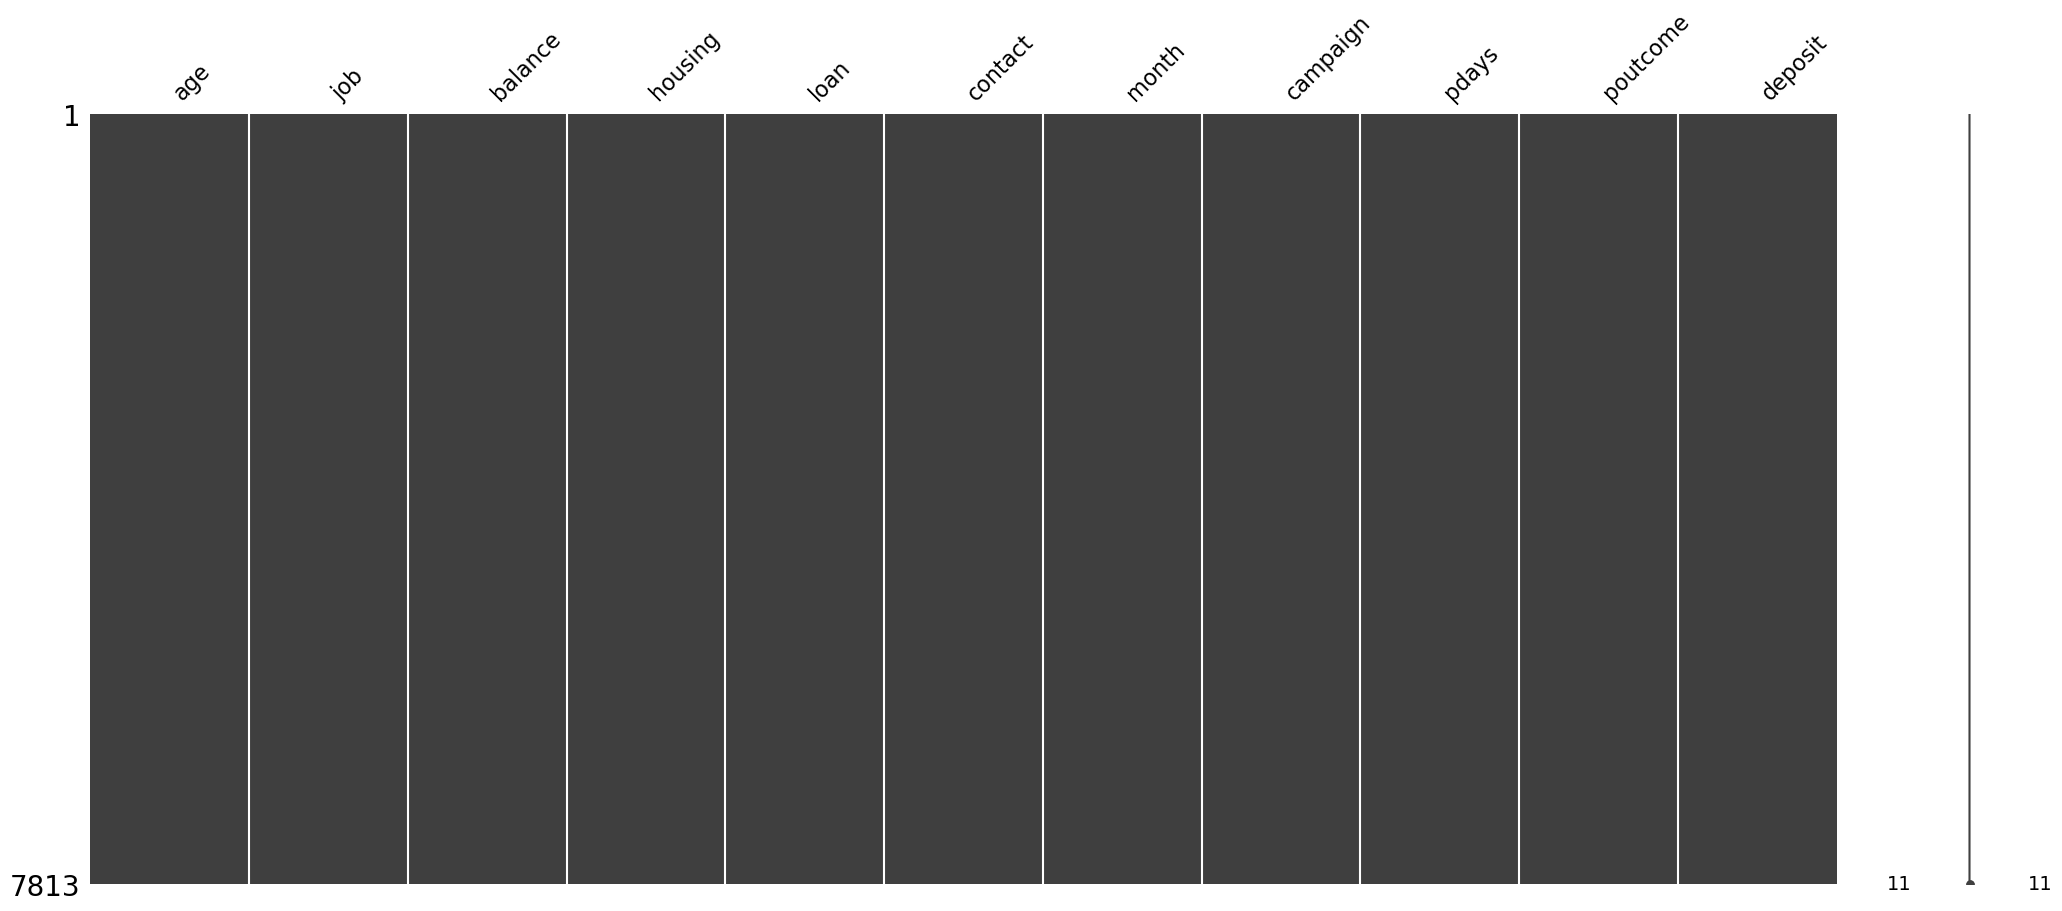

In [360]:
!pip install missingno
import missingno as msno
msno.matrix(df)

Karena tidak terdapat data kosong pada seluruh kolom dataset maka tidak perlu dilakukan penangan khusus pada missing value.

## Duplicate Data 

In [365]:
print(f'Jumlah Duplikat Data Terdapat {df.duplicated().sum()} Data')

Jumlah Duplikat Data Terdapat 8 Data


In [364]:
# Melihat Duplikat data 
df.loc[df.duplicated(), :]

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
2944,40,blue-collar,0,yes,no,unknown,may,2,-1,unknown,no
4368,60,management,0,no,no,cellular,aug,3,-1,unknown,yes
4874,41,management,0,no,no,cellular,aug,2,-1,unknown,no
5326,44,blue-collar,0,yes,no,cellular,jul,1,-1,unknown,no
5609,39,technician,0,yes,no,unknown,may,1,-1,unknown,no
5681,38,technician,0,no,no,cellular,aug,2,-1,unknown,no
5905,34,management,0,no,no,cellular,aug,2,-1,unknown,no
7077,30,blue-collar,239,yes,no,unknown,may,1,-1,unknown,yes


In [367]:
# Persentase Data Duplikat 
print('Persentase data duplikat:',len(df[df.duplicated()])/len(df))

Persentase data duplikat: 0.0010239344681940356


data duplikat yang ditemukan sangat kecil, yaitu hanya sekitar 0.1%, maka sebaiknya tidak perlu melakukan drop data duplikat tersebut.

In [368]:
# Column Cek 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813 entries, 0 to 7812
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       7813 non-null   int64 
 1   job       7813 non-null   object
 2   balance   7813 non-null   int64 
 3   housing   7813 non-null   object
 4   loan      7813 non-null   object
 5   contact   7813 non-null   object
 6   month     7813 non-null   object
 7   campaign  7813 non-null   int64 
 8   pdays     7813 non-null   int64 
 9   poutcome  7813 non-null   object
 10  deposit   7813 non-null   object
dtypes: int64(4), object(7)
memory usage: 671.6+ KB


Semua feature pada dataset sudah dirasa relevan dengan permasalahan yang sedang dihadapi yaitu membangun sebuah model yang dapat memprediksi harga jual apartment yang sesuai dengan harga pasar berdasarkan berbagai faktor baik eksternal maupun internal yang dapat menentukan harga jual apartment. Selain itu semua feature juga ada sebelum melakukan prediksi harga apartment. Oleh karena itu tidak akan ada kolom yang didrop.

###  Plotting Correlation Heatmap

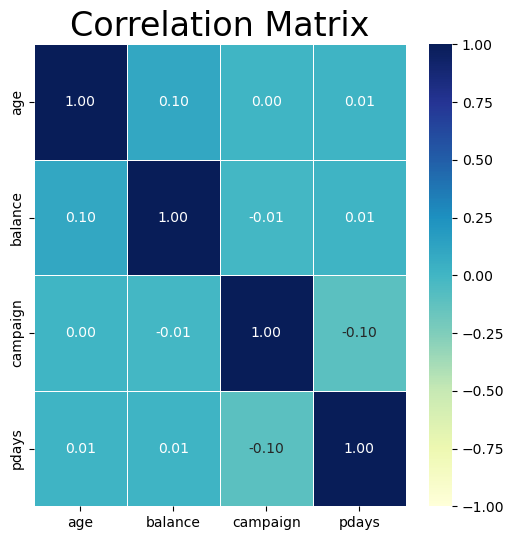

In [370]:
plt.figure(figsize=(6, 6))
corr = df.corr(method='pearson')
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt='.2f',cmap='YlGnBu',linewidths=.5)
plt.title('Correlation Matrix',size=24)
plt.show()

Correlation matrix adalah matriks persegi yang menunjukkan nilai korelasi antara dua atau lebih variabel dalam sebuah dataset. Setiap sel pada matriks menunjukkan nilai korelasi antara dua variabel yang bersesuaian, di mana nilai tersebut dapat berkisar antara -1 hingga 1. Nilai korelasi 1 menunjukkan korelasi positif sempurna (artinya, kedua variabel selalu naik atau turun bersama), sedangkan nilai korelasi -1 menunjukkan korelasi negatif sempurna (artinya, satu variabel selalu naik ketika yang lain turun). Jika nilai korelasi 0, artinya tidak ada korelasi atau hubungan linier yang signifikan antara kedua variabel.
Sehingga feature tidak memiliki korelasi terhadap target 

# Outlier 
Outlier adalah data yang berbeda secara signifikan dari sebagian besar data. Outlier dapat memiliki dampak yang signifikan pada model regresi dan menghasilkan prediksi yang tidak akurat jika tidak dikelola dengan baik. Oleh karena itu, penting untuk melakukan pengecekan outlier dan mengevaluasi apakah outlier tersebut merupakan data valid yang seharusnya dimasukkan dalam analisis. Selain itu, perlu dipertimbangkan pula metode alternatif untuk menangani outlier sebelum memutuskan untuk menghilangkannya dari analisis.

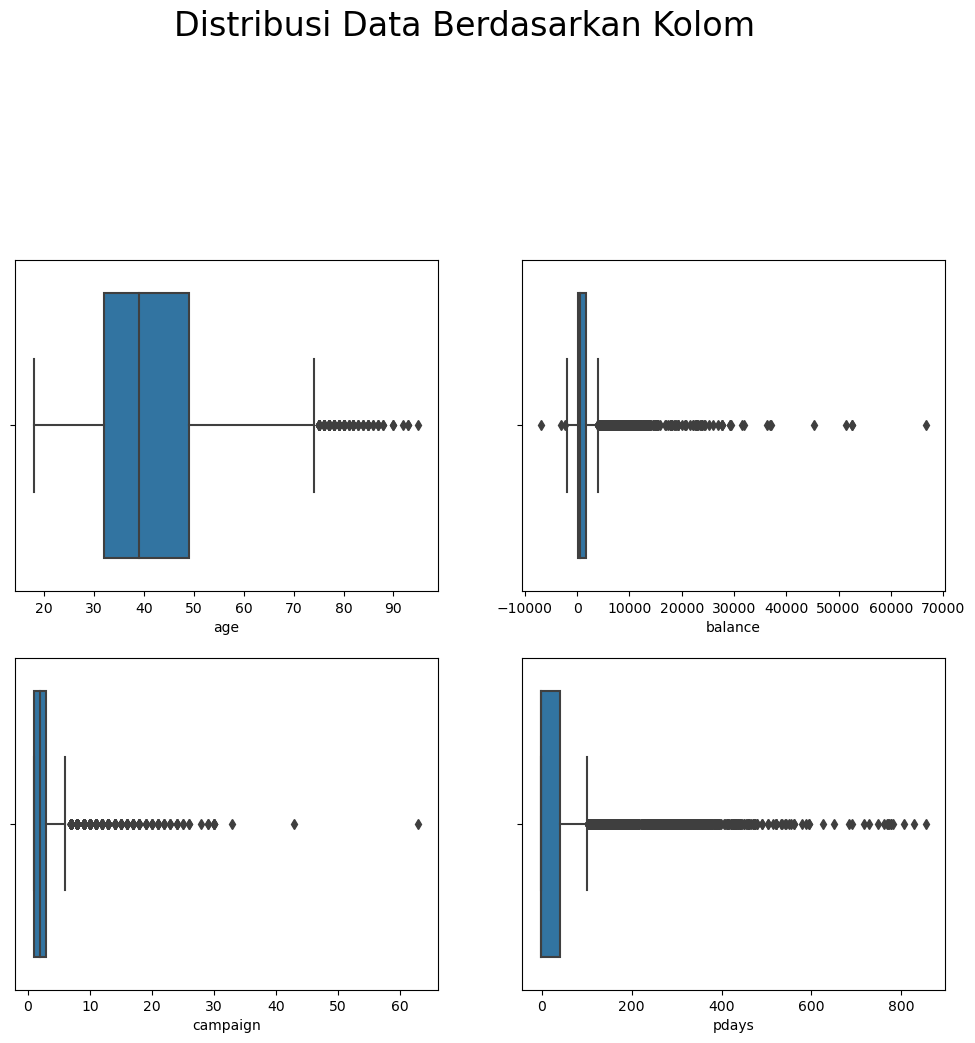

In [407]:
# Boxplot untuk mengecek outlier 

plt.figure(figsize=(12,25))

columns=['age', 'balance', 'campaign', 'pdays']

plotnumber=1
for i in columns:
    plt.subplot(5,2,plotnumber)
    sns.boxplot(data=df,x=i)
    

    plotnumber +=1

plt.suptitle('Distribusi Data Berdasarkan Kolom',size=24)
plt.show()

In [379]:
# Deteksi outlier

def detect_outliers(df):
    outliers = {}
    for col in df.columns:
        if df[col].dtype in ['int64', 'float']:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3-Q1
            lower_bound = Q1-1.5*IQR
            upper_bound = Q3+1.5*IQR
            outliers[col] = len(df[(df[col]<lower_bound) | (df[col]>upper_bound)])
    return outliers
outliers = detect_outliers(df)
for col, count in outliers.items():
    print(f'Column: {col}, Outliers total: {count}')

Column: age, Outliers total: 121
Column: balance, Outliers total: 736
Column: campaign, Outliers total: 429
Column: pdays, Outliers total: 1454


Berdasarkan hasil pengecekan outlier pada kolom 'age', 'balance', 'campaign', dan 'pdays', terdapat jumlah data outlier yang cukup signifikan pada masing-masing kolom. Hal ini menunjukkan bahwa terdapat nilai-nilai data yang jauh berbeda dengan sebagian besar nilai data pada kolom tersebut. Oleh karena itu, perlu dilakukan pengecekan lebih lanjut terhadap data outlier ini untuk memastikan apakah nilai outlier tersebut masih valid atau tidak, dan perlu dipertimbangkan apakah data outlier tersebut harus dihapus atau diolah menggunakan metode statistik tertentu.

In [383]:
# Pengecekan outlier

def outlier(df_model):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3-Q1
    print(f'''
    IQR: {Q3-Q1}
    Lower bound: {Q1-(1.5*IQR)}
    Upper bound: {Q3+(1.5*IQR)}
    ''')

In [389]:
# Outlier pada age, balance, campaign, pdays

print('Ukuran apartment')
outlier(df['age'])

Ukuran apartment

    IQR: age           17.0
balance     1557.0
campaign       2.0
pdays         41.0
dtype: float64
    Lower bound: age            6.5
balance    -2208.5
campaign      -2.0
pdays        -62.5
dtype: float64
    Upper bound: age           74.5
balance     4019.5
campaign       6.0
pdays        101.5
dtype: float64
    


In [393]:
print('Statistik deskriptif untuk age')
display(df['age'].describe())

print('Statistik deskriptif untuk balance')
display(df['balance'].describe())

print('Statistik deskriptif untuk campaign')
display(df['campaign'].describe())

print('Statistik deskriptif untuk pdays')
display(df['pdays'].describe())

Statistik deskriptif untuk age


count    7813.000000
mean       41.257264
std        11.919710
min        18.000000
25%        32.000000
50%        39.000000
75%        49.000000
max        95.000000
Name: age, dtype: float64

Statistik deskriptif untuk balance


count     7813.000000
mean      1512.448611
std       3089.291831
min      -6847.000000
25%        127.000000
50%        549.000000
75%       1684.000000
max      66653.000000
Name: balance, dtype: float64

Statistik deskriptif untuk campaign


count    7813.000000
mean        2.519775
std         2.727001
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        63.000000
Name: campaign, dtype: float64

Statistik deskriptif untuk pdays


count    7813.000000
mean       51.408550
std       108.072739
min        -1.000000
25%        -1.000000
50%        -1.000000
75%        40.000000
max       854.000000
Name: pdays, dtype: float64

In [396]:
# Checking data yang melebihi batas pada feature age

print('Jumlah outlier pada feature age:', df[df['age'] > 74.5].count()['age'])

# Checking data yang melebihi batas pada feature balance

print('Jumlah outlier pada feature balance:', df[df['balance'] > 4019.5].count()['balance'])

# Checking data yang melebihi batas pada feature campaign

print('Jumlah outlier pada feature campaign:', df[df['campaign'] > 6.0].count()['campaign'])

# Checking data yang melebihi batas pada feature pdays

print('Jumlah outlier pada feature pdays:', df[df['pdays'] > 101.5].count()['pdays'])

Jumlah outlier pada feature age: 121
Jumlah outlier pada feature balance: 733
Jumlah outlier pada feature campaign: 429
Jumlah outlier pada feature pdays: 1454


Fitur Age: Terdapat 121 outlier pada fitur Age. Outlier dalam fitur Age mungkin terjadi karena kesalahan input atau kemungkinan adanya data yang kurang valid, seperti orang yang memberikan usia palsu atau data yang tidak benar. Namun, kita juga harus mempertimbangkan bahwa ada kemungkinan bahwa orang tersebut benar-benar memiliki usia yang sangat jauh dari nilai rata-rata di dataset, dan dalam kasus seperti ini, outlier harus tetap dipertahankan.

Fitur Balance: Terdapat 733 outlier pada fitur Balance. Outlier dalam fitur Balance dapat menunjukkan adanya kemungkinan ketidakseimbangan dalam data, atau adanya kelompok orang yang memiliki jumlah saldo yang jauh lebih tinggi atau lebih rendah dari kebanyakan orang dalam dataset.

Fitur Campaign: Terdapat 429 outlier pada fitur Campaign. Outlier dalam fitur Campaign mungkin terjadi karena beberapa alasan, seperti kesalahan input, data yang tidak benar, atau adanya orang yang memiliki jumlah kampanye yang jauh lebih tinggi atau lebih rendah dari kebanyakan orang dalam dataset.

Fitur Pdays: Terdapat 1454 outlier pada fitur Pdays. Outlier dalam fitur Pdays mungkin terjadi karena beberapa alasan, seperti kesalahan input atau adanya data yang kurang valid, seperti orang yang memberikan nilai yang salah atau data yang tidak benar. Namun, kita juga harus mempertimbangkan bahwa ada kemungkinan bahwa orang tersebut benar-benar memiliki nilai Pdays yang sangat jauh dari nilai rata-rata di dataset, dan dalam kasus seperti ini, outlier harus tetap dipertahankan.

Dalam analisis statistik, outlier dapat memengaruhi nilai rata-rata, standar deviasi, dan metrik lainnya. Oleh karena itu, penting untuk memahami penyebab kemunculan outlier dalam dataset dan memutuskan apakah harus membuang atau mempertahankan outlier tersebut.

## Feature Engineering 

In [401]:
df.columns

Index(['age', 'job', 'balance', 'housing', 'loan', 'contact', 'month',
       'campaign', 'pdays', 'poutcome', 'deposit'],
      dtype='object')

In [402]:
df.nunique()

age           75
job           12
balance     3153
housing        2
loan           2
contact        3
month         12
campaign      32
pdays        422
poutcome       4
deposit        2
dtype: int64

* **Scalling** 
Scaling digunakan untuk mengubah rentang atau skala data. Seperti ketika melakukan analisis data age , scaling dapat digunakan untuk mengubah rentang data numerik dari 0-1 atau -1 hingga 1 untuk memudahkan dalam analisis.
* **Encoding** 
* One-Hot Encoding: Encoding ini digunakan untuk mengubah data kategorikal menjadi data numerik. Dalam one-hot encoding, setiap nilai kategori diubah menjadi suatu vektor biner dengan panjang sama dengan jumlah kategori. Setiap posisi dalam vektor merepresentasikan kategori tertentu dan bernilai 1 jika data tersebut termasuk dalam kategori tersebut, dan bernilai 0 jika tidak termasuk. Pada implementasi ini saya menggunakan one hot encoding untuk feature housing, loan, contact, poutcome.
* Ordinal Encoding: Encoding ini digunakan untuk mengubah data kategorikal menjadi data numerik dengan memberikan label numerik berdasarkan urutan kategori. Kategori dengan nilai yang lebih tinggi akan diberikan nilai yang lebih besar. Dalam kasus ini saya menggunakan ordinal encoding untuk merubah feature month menjadi numerik.

In [411]:
df.describe()

,age,balance,campaign,pdays
count,7813.000000,7813.000000,7813.000000,7813.000000
mean,41.257264,1512.448611,2.519775,51.408550
std,11.919710,3089.291831,2.727001,108.072739
min,18.000000,-6847.000000,1.000000,-1.000000
25%,32.000000,127.000000,1.000000,-1.000000
50%,39.000000,549.000000,2.000000,-1.000000
75%,49.000000,1684.000000,3.000000,40.000000
max,95.000000,66653.000000,63.000000,854.000000


In [412]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()

In [233]:
# Ordinal Mapping
ordinal_mapping = [
    {'col':'month',
    'mapping':{
        'jan'       :    0,
        'feb'       :    1, 
        'mar'       :    2, 
        'apr'       :    3, 
        'may'       :    4, 
        'jun'       :    5,
        'jul'       :    6,
        'aug'       :    7,
        'sep'       :    8, 
        'oct'       :    9, 
        'nov'       :    10, 
        'dec'       :    11,
    }}
]

In [413]:
# Scalling & Encoding
transformer = ColumnTransformer([
    ('scale', std,['age', 'balance','campaign','pdays']),
    ('onehot', OneHotEncoder(drop = 'first'), ['housing', 'loan', 'contact', 'poutcome', 'job']),
    ('ordinal', ce.OrdinalEncoder(mapping = ordinal_mapping), ['month'])
], remainder = 'passthrough')

### Train Split Test 
Dalam pemodelan klasifikasi, variabel independen disebut x dan variabel dependen disebut y. Variabel x digunakan sebagai prediktor untuk memprediksi nilai variabel y. Artinya, x adalah input dan y adalah output dari model klasifikasi. Tujuan dari pemodelan klasifikasi adalah untuk memprediksi nilai y berdasarkan nilai x yang telah diberikan.
* X = Job, balance, age, housing, loan, contact, month, campaign, pdays, poutcome, deposit
* Y = Deposit


In [419]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline

In [414]:
x = df.drop(columns=['deposit'])
y = np.where(df['deposit'] == 'yes', 1 ,0)

In [415]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, test_size = 0.2, random_state=2020)

## Model Selection

* Logistic Regression (LogReg)
Logistic Regression adalah model klasifikasi yang digunakan untuk memprediksi kemungkinan atau probabilitas suatu kejadian atau hasil. Model ini bekerja dengan memperkirakan probabilitas kejadian dengan menggunakan fungsi logistik atau sigmoid. Logistic Regression digunakan dalam berbagai aplikasi, seperti analisis risiko kredit, deteksi spam, dan pengenalan wajah.

* K-Nearest Neighbors (KNN)
K-Nearest Neighbors adalah model klasifikasi non-parametrik yang bekerja dengan cara mencari titik data terdekat (dalam hal ini, nilai x) dengan data yang sedang diprediksi, kemudian menggunakan label kelas data tetangga terdekat untuk memprediksi label kelas data yang sedang diprediksi. KNN sering digunakan dalam masalah klasifikasi, regresi, dan clustering.

* Decision Tree (DecTree)
Decision Tree adalah model klasifikasi yang bekerja dengan membuat struktur pohon berjenjang untuk menggambarkan hubungan antara variabel input dan output. Setiap simpul pada pohon representasi suatu keputusan berdasarkan nilai variabel input. Model ini dapat digunakan dalam berbagai aplikasi seperti diagnosis medis, prediksi harga saham, dan klasifikasi citra.

* Extreme Gradient Boosting (XGBoost)
Extreme Gradient Boosting adalah model ensemble yang digunakan dalam berbagai aplikasi, termasuk klasifikasi, regresi, dan ranking. Model ini bekerja dengan memperkuat model machine learning dengan mengkombinasikan beberapa model yang lebih sederhana. XGBoost terkenal karena kemampuannya dalam menangani data besar dan kompleks serta meningkatkan akurasi prediksi.

* Random Forest
Random Forest adalah model ensemble yang menggunakan beberapa pohon keputusan (decision tree) untuk meningkatkan akurasi prediksi. Model ini bekerja dengan membuat banyak pohon keputusan, di mana setiap pohon dibuat dari subset acak dari data dan variabel input. Setiap pohon memberikan prediksi, dan hasilnya digabungkan untuk memberikan hasil akhir. Random Forest dapat digunakan dalam berbagai aplikasi, termasuk klasifikasi, regresi, dan klasifikasi citra. Model ini terkenal karena kemampuannya dalam menangani data yang berukuran besar dan memiliki fitur banyak, serta dapat menghindari overfitting.

In [416]:
# Model Libraries 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from xgboost.sklearn import XGBClassifier

In [417]:
# Benchmark Models

knn = KNeighborsClassifier(n_neighbors = 3)
logreg = LogisticRegression(max_iter = 200, random_state = 2020)
rf = RandomForestClassifier(max_depth = 3, random_state = 2020)
dt = DecisionTreeClassifier(max_depth = 3,random_state = 2020)
xgb = XGBClassifier(n_estimators = 200, learning_rate = 0.1, max_depth = 3, random_state = 2020)

In [467]:
models = [knn, logreg, rf, dt, xgb]
score=[]
rata=[]
std=[]

for i in models:
    skfold = StratifiedKFold(n_splits = 5)
    estimator = Pipeline([
        ('preprocess', transformer),
        ('smote', SMOTE()),
        ('model', i)])
    model_cv = cross_val_score(estimator, X=x_train, y=y_train, cv = skfold, scoring = 'precision')
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())

In [471]:
pd.DataFrame({'model':[x for x in models], 'precision' : rata, 'std dev' : std}).set_index('model').sort_values('precision', ascending = False)

,precision,std dev
model,,
KNeighborsClassifier(n_neighbors=100),0.736457,0.028133
"XGBClassifier(base_score=None, booster=None, callbacks=None,\n colsample_bylevel=None, colsample_bynode=None,\n colsample_bytree=None, early_stopping_rounds=None,\n enable_categorical=False, eval_metric=None, feature_types=None,\n gamma=None, gpu_id=None, grow_policy=None, importance_type=None,\n interaction_constraints=None, learning_rate=0.1, max_bin=None,\n max_cat_threshold=None, max_cat_to_onehot=None,\n max_delta_step=None, max_depth=3, max_leaves=None,\n min_child_weight=None, missing=nan, monotone_constraints=None,\n n_estimators=200, n_jobs=None, num_parallel_tree=None,\n predictor=None, random_state=2020, ...)",0.733967,0.017907
"RandomForestClassifier(max_depth=3, random_state=2020)",0.679853,0.011438
"LogisticRegression(max_iter=200, random_state=2020)",0.658179,0.008057
"DecisionTreeClassifier(max_depth=3, random_state=2020)",0.637944,0.006879


Berdasarkan hasil pemodelan dengan beberapa model klasifikasi, didapatkan bahwa K-Nearest Neighbors (KNN) memberikan performa terbaik dengan akurasi sebesar 0.736457 dan standard deviation 0.028133. XGBoost dan Random Forest memberikan akurasi yang hampir sama, yaitu sekitar 0.73, namun XGBoost memiliki standard deviation yang lebih rendah dibandingkan Random Forest. Sedangkan Logistic Regression dan Decision Tree memberikan performa yang lebih rendah dibandingkan tiga algoritma lainnya. Oleh karena itu, dapat disimpulkan bahwa KNN adalah algoritma yang paling cocok untuk digunakan dalam memprediksi label deposit pada dataset yang diberikan.

## Model Tuning

In [477]:
# hyperparameter 
param = {'algo__n_neighbors': range(1,30,2),
 'algo__weights': ['uniform', 'distance'],
 'algo__p': [1, 1.5, 2]}

In [425]:
# Metric Libraries
from sklearn.metrics import f1_score, recall_score, precision_score, classification_report, roc_auc_score

In [480]:
# KNNClassification
skfold = StratifiedKFold(n_splits = 5)

estimator = Pipeline([
    ('preprocess', transformer),
    ('smote', SMOTE()),
    ('algo', KNeighborsClassifier())])
    
model_cv = GridSearchCV(estimator=estimator,param_grid=param, cv = skfold, scoring = 'precision', verbose=3)
model_cv.fit(x_train,y_train)

model_cv.best_score_

0.7391525622463216

KNN Classification yang diimplementasikan dengan menggunakan pipeline preprocessing dan teknik SMOTE memberikan hasil yang cukup baik dengan skor presisi sebesar 0.739 angka ini telah membaik dibandingkan dengan sebelum melakukan hyperparamater, pada data training dengan menggunakan GridSearchCV dan 5-fold Stratified Cross Validation.

In [481]:
# Parameter Terbaik 
print('Parameter terbaik:')
model_cv.best_params_

Parameter terbaik:


{'algo__n_neighbors': 29, 'algo__p': 1, 'algo__weights': 'uniform'}

Hasil parameter terbaik menunjukkan bahwa untuk algoritma K-Nearest Neighbors, nilai optimal untuk n_neighbors adalah 29, p adalah 1 (menggunakan Manhattan Distance) dan weights adalah uniform (memberikan bobot yang sama pada semua tetangga terdekat). 

## PREDICTION and EVALUATION

In [482]:
tuned_model = model_cv.best_estimator_

tuned_model.fit(x_train, y_train)

y_pred_tuned = tuned_model.predict(x_test)

In [483]:
print(classification_report(y_test,y_pred_tuned))

              precision    recall  f1-score   support

           0       0.69      0.80      0.74       816
           1       0.74      0.61      0.67       747

    accuracy                           0.71      1563
   macro avg       0.71      0.71      0.70      1563
weighted avg       0.71      0.71      0.71      1563



* Model tersebut diuji dengan menggunakan 1563 data dan mencapai akurasi (accuracy) sebesar 0.73, yang berarti sekitar 73% dari data dapat diklasifikasikan dengan benar oleh model.
* Untuk kelas 0 (negative), model memiliki presisi (precision) sebesar 0.70, yang artinya 70% dari data yang diprediksi sebagai negative benar-benar negative. Recall (sensitivity) untuk kelas 0 sebesar 0.83, yang artinya model dapat mengidentifikasi 83% dari total data yang seharusnya diklasifikasikan sebagai negative. F1-score untuk kelas 0 sebesar 0.76, yang merupakan rata-rata harmonis dari presisi dan recall. Support untuk kelas 0 adalah 816.
* Untuk kelas 1 (positive), model memiliki presisi sebesar 0.77, yang artinya 77% dari data yang diprediksi sebagai positive benar-benar positive. Recall untuk kelas 1 sebesar 0.62, yang artinya model hanya dapat mengidentifikasi 62% dari total data yang seharusnya diklasifikasikan sebagai positive. F1-score untuk kelas 1 sebesar 0.68. Support untuk kelas 1 adalah 747.
* Pada nilai macro average, model memiliki presisi 0.74, recall 0.72, dan f1-score 0.72.
* Pada nilai weighted average, model memiliki presisi 0.74, recall 0.73, dan f1-score 0.73.

### Perbandingan perform model KNeighborsClassifier  Sebelum dan Sesudah Hyperparametertuning

In [500]:
# Sebelum Hyperparametertuning
pd.DataFrame({'model':[x for x in models], 'precision' : rata, 'std dev' : std}).set_index('model').sort_values('precision', ascending = False)

,precision,std dev
model,,
KNeighborsClassifier(n_neighbors=100),0.736457,0.028133
"XGBClassifier(base_score=None, booster=None, callbacks=None,\n colsample_bylevel=None, colsample_bynode=None,\n colsample_bytree=None, early_stopping_rounds=None,\n enable_categorical=False, eval_metric=None, feature_types=None,\n gamma=None, gpu_id=None, grow_policy=None, importance_type=None,\n interaction_constraints=None, learning_rate=0.1, max_bin=None,\n max_cat_threshold=None, max_cat_to_onehot=None,\n max_delta_step=None, max_depth=3, max_leaves=None,\n min_child_weight=None, missing=nan, monotone_constraints=None,\n n_estimators=200, n_jobs=None, num_parallel_tree=None,\n predictor=None, random_state=2020, ...)",0.733967,0.017907
"RandomForestClassifier(max_depth=3, random_state=2020)",0.679853,0.011438
"LogisticRegression(max_iter=200, random_state=2020)",0.658179,0.008057
"DecisionTreeClassifier(max_depth=3, random_state=2020)",0.637944,0.006879


In [516]:
# Sesudah Hyperparametertuning 
print('KNN Score setelah Hyperparametertuning:',model_cv.best_score_)

KNN Score setelah Hyperparametertuning: 0.7391525622463216


Terdapat peningkatan sebesar 0.002695 atau sekitar 0.27% dari KNN score sebelumnya (0.736457) setelah melakukan hyperparameter tuning. Dapat disimpulkan bahwa hyperparameter tuning membantu untuk meningkatkan performa model KNN dalam memprediksi deposit pada data set yang diberikan.

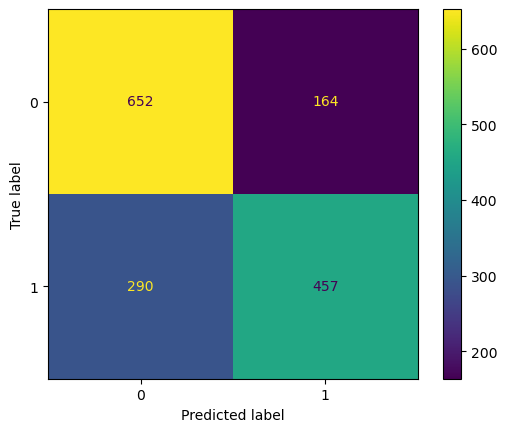

In [490]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_tuned)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

**Conclusion:**

Berdasarkan hasil classification report model, dapat disimpulkan bahwa bila seandainya menggunakan model ini untuk memfilter/menyaring list kandidat nasabah, maka model ini dapat mengurangi 69% kandidat nasabah tidak potensial untuk tidak di approach melalui kampanye, dan model dapat memprediksi dengan benar 74% kandidat nasabah yang tertarik, dengan skor False Positive mencapai 25%. 
Tanpa model, perusahaan akan melakukan kampanye terhadap 1563 kandidat nasabah yang mana tidak semuanya adalah kandidat nasabah potensial untuk menaruh deposit. Sedangkan dengan model, perusahaan dapat mengerucutkan target kampanye menjadi hanya 652 kandidat nasabah potensial saja, yang mana ini akan meningkatkan efisiensi bagi bank baik dari segi finansial maupun waktu.

maka dari itu, kesimpulannya adalah penggunaan model dapat menjawab bussiness problem bank.

**Recommendation:**

Beberapa poin yang bisa dilakukan untuk membuat model menjadi lebih baik adalah:
* menambah fitur yang memiliki pengaruh kuat terhadap target, misal: status perkawinan, pendapatan, dll
* melakukan improvisasi pada model seperti melakukan hyperparameter tuning kembali, atau membuat model dengan algoritma yang lain

# Save Model 

In [534]:
pickle.dump(tuned_model, open('knn_model.sav', 'wb'))